In [67]:
from sklearn.datasets import load_iris
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [68]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
df.isnull().sum().sum()

0

In [70]:
X = df
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [71]:
model = LogisticRegression(solver="saga", max_iter=2000)
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)
r2_score(y_predicted,y_test)

1.0

In [72]:
confu_matrix = confusion_matrix(y_test, y_predicted)
confu_matrix

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

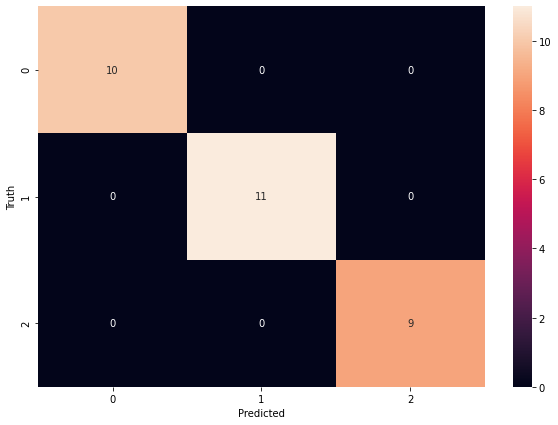

In [74]:
plt.figure(figsize=(10, 7))
sns.heatmap(confu_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [77]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi